In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset_at_the_end.csv')
df.head()

,Unnamed: 0,genre,storyline,title
0,0,Action Comedy Crime,"Elwood, the now lone ""Blues Brother"" finally r...",Braća Blues 2000
1,1,Comedy Drama Family,Troy and the gang of East High School are goin...,High School Musical 3: Maturanti
2,2,Comedy Family Music,"When the teenager Mary Elizabeth Steppe, a.k.a...",Confessions of a Teenage Drama Queen
3,3,Animation Comedy Family,After a concert mishap lands Dave in the hospi...,Alvin and the Chipmunks: The Squeakquel
4,4,Animation Adventure Comedy,"Playing around while aboard a cruise ship, the...",Alvin i vjeverice 3


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.25)

train.to_csv('dataset_train.csv')
test.to_csv('dataset_test.csv')

In [5]:
train_lines = []

count_by_genre_train = dict()
count_by_number_of_genres_train = dict()

for index, row in train.iterrows():
    genres = row['genre'].split(" ")
    no_genres = len(genres)
    if no_genres in count_by_number_of_genres_train:
        count_by_number_of_genres_train[no_genres] += 1
    else:
        count_by_number_of_genres_train[no_genres] = 1
    for genre in genres:
        line = '__label__' + genre + ' ' + row['storyline'] 
        train_lines.append(line)     
        if genre in count_by_genre_train:
            count_by_genre_train[genre] += 1
        else:
            count_by_genre_train[genre] = 1

In [6]:
count_by_genre_train['Comedy']

2962

In [7]:
count_by_number_of_genres_train

{2: 1317, 3: 7177, 1: 191}

In [8]:
test_lines = []

count_by_genre_test = dict()
count_by_number_of_genres_test = dict()

for index, row in test.iterrows():
    genres = row['genre'].split(" ")
    no_genres = len(genres)
    if no_genres in count_by_number_of_genres_test:
        count_by_number_of_genres_test[no_genres] += 1
    else:
        count_by_number_of_genres_test[no_genres] = 1
    for genre in genres:
        line = '__label__' + genre + ' ' + row['storyline'] 
        test_lines.append(line) 
        if genre in count_by_genre_test:
            count_by_genre_test[genre] += 1
        else:
            count_by_genre_test[genre] = 1

In [9]:
count_by_genre_test['Comedy']

987

In [10]:
count_by_number_of_genres_test

{3: 2401, 2: 447, 1: 47}

{'Film-Noir': 39, 'Western': 71, 'Musical': 90, 'Sport': 165, 'War': 165, 'Music': 311, 'History': 322, 'Family': 632, 'Biography': 765, 'Sci-Fi': 848, 'Animation': 905, 'Fantasy': 924, 'Horror': 960, 'Mystery': 1002, 'Romance': 1121, 'Thriller': 1319, 'Crime': 1992, 'Adventure': 2648, 'Action': 2789, 'Comedy': 2962, 'Drama': 4326}
{'Film-Noir': 10, 'Western': 21, 'Musical': 22, 'Sport': 52, 'War': 58, 'Music': 95, 'History': 109, 'Family': 214, 'Biography': 264, 'Sci-Fi': 318, 'Animation': 329, 'Fantasy': 307, 'Horror': 324, 'Mystery': 348, 'Romance': 353, 'Thriller': 468, 'Crime': 641, 'Adventure': 888, 'Action': 936, 'Comedy': 987, 'Drama': 1400}


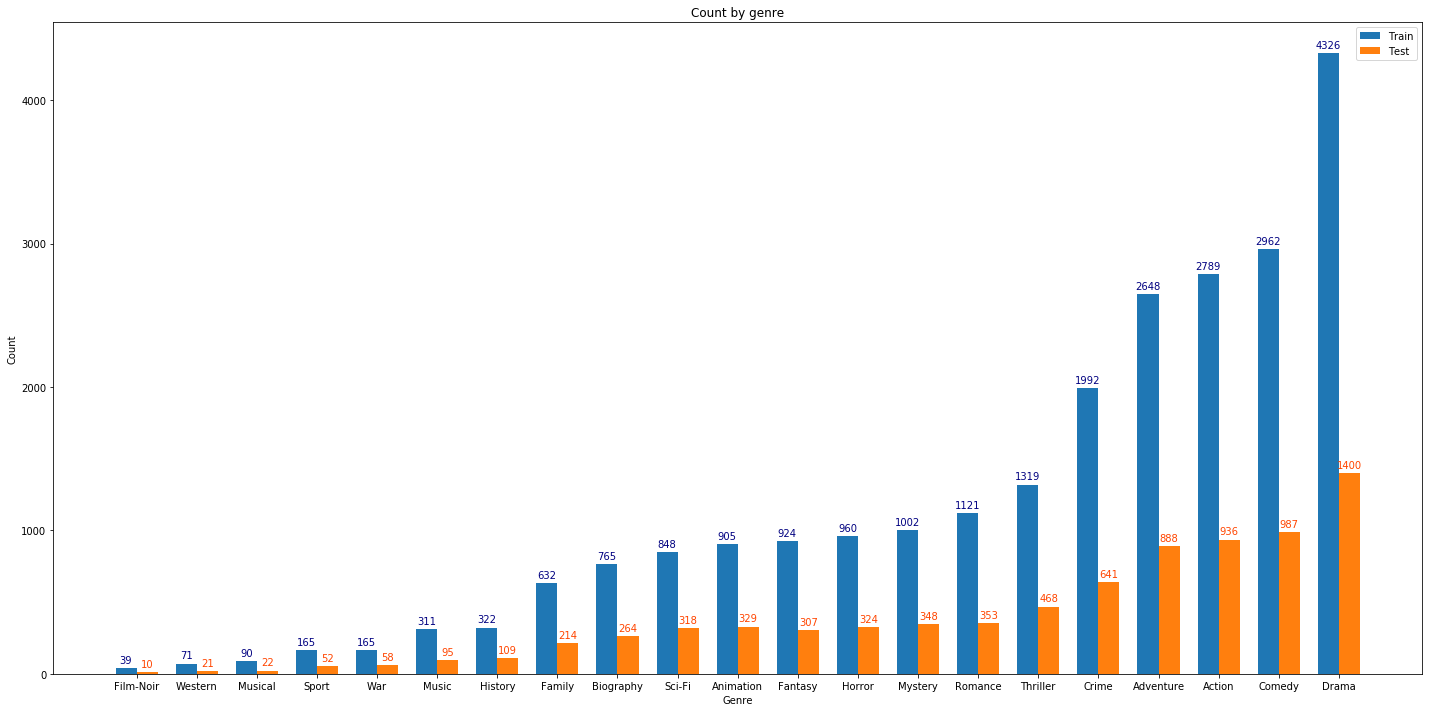

In [11]:
#plot
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import operator

def sort_by_another_dict(sorted_dict, dict_to_sort):
    output = dict()
    for key in sorted_dict.keys():
        output[key] = dict_to_sort[key]
    return output

sorted_train = dict(sorted(count_by_genre_train.items(), key=operator.itemgetter(1)))
sorted_test = sort_by_another_dict(sorted_train, count_by_genre_test)

print(sorted_train)
print(sorted_test)

labels = list(sorted_train.keys())
train_values = list(sorted_train.values())
test_values = list(sorted_test.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Count by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects, c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=c)
        
autolabel(rects1, (0.0, 0.0, 0.5, 1.0))
autolabel(rects2, (1.0, 0.27, 0.0, 1.0))

fig.tight_layout()

plt.savefig('dataset.png')
plt.show()

{1: 191, 2: 1317, 3: 7177}
{1: 47, 2: 447, 3: 2401}


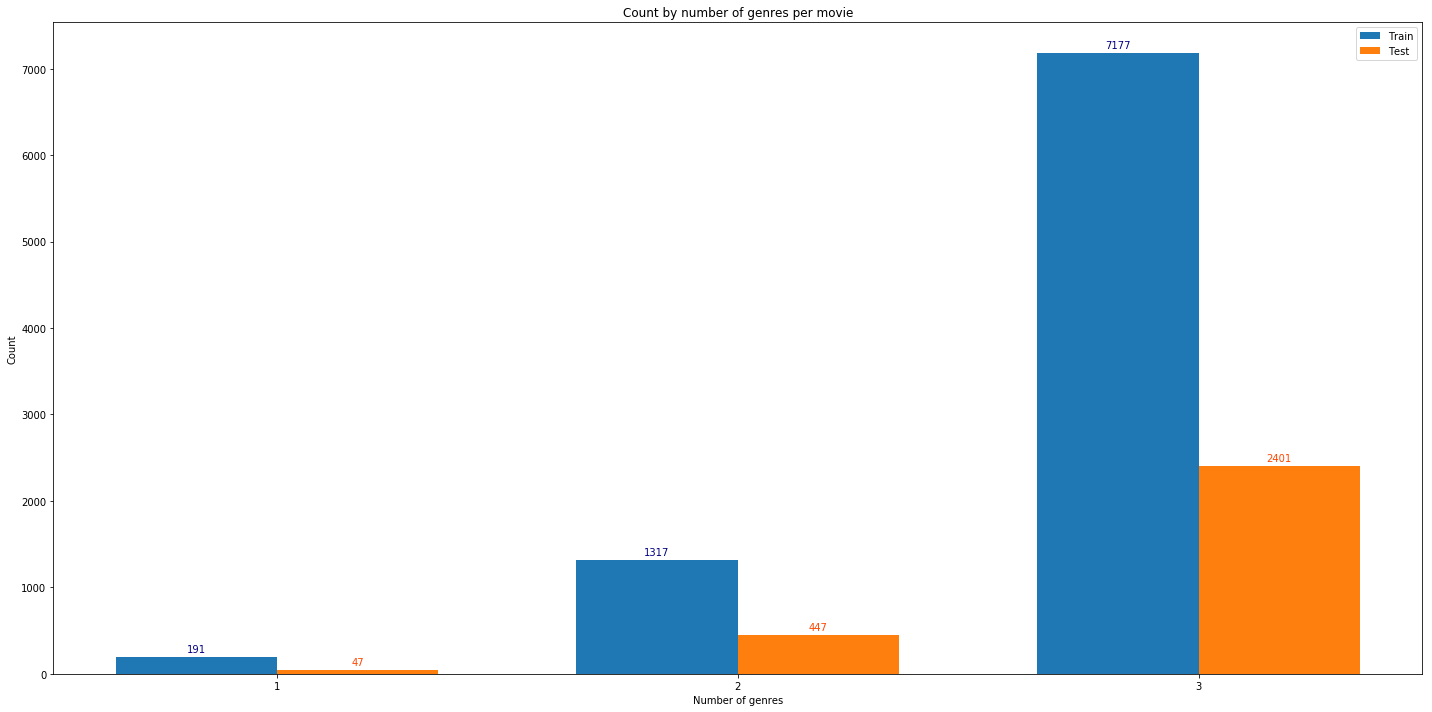

In [12]:
sorted_train = dict(sorted(count_by_number_of_genres_train.items(), key=operator.itemgetter(1)))
sorted_test = sort_by_another_dict(sorted_train, count_by_number_of_genres_test)

print(sorted_train)
print(sorted_test)

labels = list(sorted_train.keys())
train_values = list(sorted_train.values())
test_values = list(sorted_test.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

ax.set_xlabel('Number of genres')
ax.set_ylabel('Count')
ax.set_title('Count by number of genres per movie')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
        
autolabel(rects1, (0.0, 0.0, 0.5, 1.0))
autolabel(rects2, (1.0, 0.27, 0.0, 1.0))

fig.tight_layout()

plt.savefig('dataset_genres_per_movie.png')
plt.show()

In [9]:
train_lines[0]y1=[20,80]
y2=[60,30,10]
x1 = np.arange(len(y1))
x2 = np.arange(len(y2))+groupgap+len(y1)
ind = np.concatenate((x1,x2))

"__label__Drama Caleb, a 26 year old programmer at the world's largest internet company, wins a competition to spend a week at a private mountain retreat belonging to Nathan, the reclusive CEO of the company. But when Caleb arrives at the remote location he finds that he will have to participate in a strange and fascinating experiment in which he must interact with the world's first true artificial intelligence, housed in the body of a beautiful robot girl."

In [26]:
type(train_lines)

list

In [27]:
with open('dataset_train.txt', 'w') as f:
    for line in train_lines:
        f.write("%s\n" % line)

In [29]:
with open('dataset_test.txt', 'w') as f:
    for line in test_lines:
        f.write("%s\n" % line)